# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


# **_Data Validation_**

## Task 1 

The dataset contains 1500 rows and 8 columns with missing values before the cleaning process. Lets validate all the columns against the criteria in the dataset table:

1. Booking ID: Same as description, no missing values.
2. Months as member (minimum 1 month): Same as description, no missing values.
3. Weight (kg): 20 missing values, so I replace each one with the overall average weight. 
4. Days before (minimum 1 day): Same as description, no missing values.
5. Day of week: Same as description, no missing values.
6. Time (AM or PM): Same as description, no missing values. 
7. Category: Same as description, few missing values, replace them with 'unknown'
8. Attended: Same as description, no missing values.

In [397]:
# Data Validation
# Check all variables in the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fitness_class_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [398]:
# Lets fill the 20 missing values of weight column
overall_average_weight = df['weight'].mean()
df['weight'] = df['weight'].fillna(overall_average_weight)

# Lets check that there are no missing values now.

df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [399]:
# Replace missing values '-' with 'unknown'

df['category'] = df['category'].replace('-','unknown')

# Check if modified

display( list(df['category'].unique()) )

['Strength', 'HIIT', 'Cycling', 'Yoga', 'unknown', 'Aqua']

# **_Exploratory Analysis_**

## Task 2
## Number of attendances
As seen by the histogram of number of attendences (**Fig1**), there is a lot of bookings that did not attend (more than double of attendances). We can also see in **Fig2** that if we plot the number of attendances by each category there is a lot of people that attend HIIT fitness class, followed behind by ciclying and strength but it is not balanced across categories. The remaining ones are not much attended. 

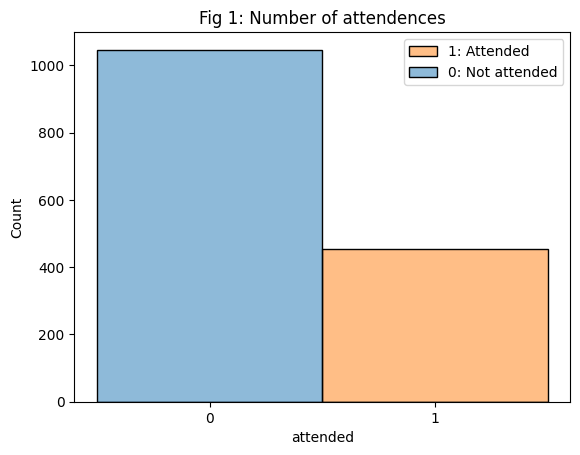

In [400]:
sns.histplot(data=df, x='attended', hue = 'attended', bins=2, discrete= True)
plt.xticks([0,1])
plt.title('Fig 1: Number of attendences')
plt.legend(('1: Attended','0: Not attended'))
plt.show()

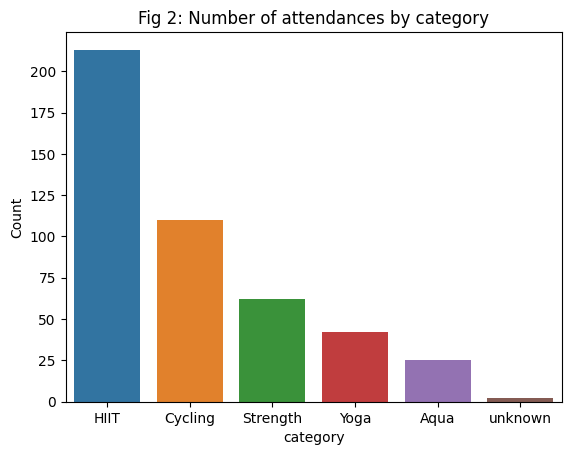

In [401]:
number_of_attendances_by_cat = df.groupby('category')['attended'].sum()
number_of_attendances_by_cat = number_of_attendances_by_cat.sort_values(ascending=False) # Sort in descending order
sns.barplot(x = number_of_attendances_by_cat.index, y = number_of_attendances_by_cat.values)
plt.title('Fig 2: Number of attendances by category')
plt.ylabel('Count')
plt.show()


## Task 3
## Distribution of number of months as member 
## 
To describe the distribution of the number of months as a member a histogram plot comes very in handy. We can see in **Fig4** that the distribution is a right skewed distribution that shows that the majority of members have been members for 10 months, and as we increase the number of months (from 10 months and up) as member we see that the number of members decreases.

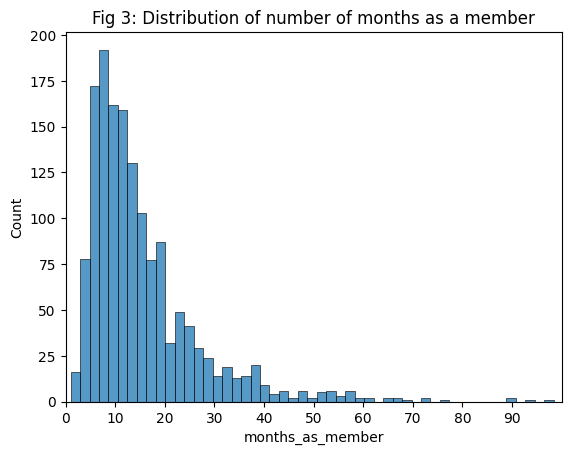

In [402]:
sns.histplot(data = df, x = 'months_as_member')
plt.title('Fig 3: Distribution of number of months as a member')
plt.xlim((0,100))
plt.xticks(np.arange(0,100,10))
plt.show()

## Task 4

## Relationship between attendance and number of months as a member
To visualize the relationship between attendance and the number of months as a member a boxplot is created. We can see that for those who did attend to class are people who in general have been members for more time compared to those who did not attend. The outliers in the left blue box show some exceptions about this as we can see that there are people who did not attend class but have been members for more than 20 months (considerably high), but overall we can somewhat affirm that people who have been members for more time tend to attend classes more than those who have not. This will be our most 'loyal' estimator for predicting later.

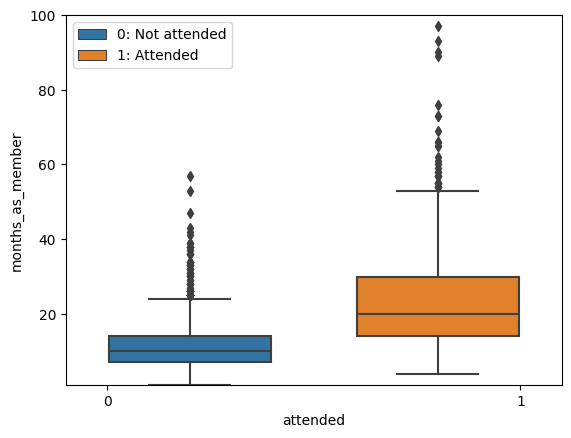

In [403]:
sns.boxplot(data=df, x = 'attended', y = 'months_as_member', hue = 'attended', order = (1,0))
plt.legend(('0: Not attended','1: Attended'))
#plt.xticks([0,1])
plt.xlim((1.1,-0.1))
plt.ylim((1,100))
plt.show()

# Machine Learning to predict attendance

## Task 5

Since we have to predict wether members will attend or not, we have a Machine Learning Classification problem because we want to predict if they belong or not to an specific category (0: not attend, 1: attend)

## Task 6
## Baseline model

In [404]:
# Model fitting - Logistic Regression

from sklearn.linear_model import LogisticRegression # Baseline model (Logistic Regression)
from sklearn.naive_bayes import GaussianNB # Comparisson model (Naive Bayes)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df['months_as_member']
X = X.to_numpy().reshape(-1,1)

y = df['attended']
y = y.to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 123)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)


## Task 7
## Comparisson model

In [405]:
# Model fitting - Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)

## Task 8
## Decision of model selection
The reason why I chose these two models is because in first place Logistic Regression is an efficient model and also it is widely used when the classification problem is binary (in this case 0 and 1). And the second model (Naive Bayes) was selected because overall it performs relatively well when the training data size is small (The whole dataset could be labeled as not big enough).

## Task 9
## Performance of models
To compare the performance of the two models I will be choosing accuracy score because it is relatively easy to interpret.
As result I got an accuracy of 75.5% in the Logistic Regression Model, and a 75.2% in the Naive Bayes Model.

In [406]:
print('Accuracy score of Logistic Regression Model:', accuracy_score(y_pred_log,y_test).round(3) )
print('Accuracy score of Naive Bayes Model:', accuracy_score(y_pred_nb,y_test).round(3) )

Accuracy score of Logistic Regression Model: 0.755
Accuracy score of Naive Bayes Model: 0.752


## Task 10
## Best Model

Because the results from both models are almost the same and it is a relatively high accuracy score I can conclude that choosing whichever of them will be a good choice. Also by checking about other features of both models like 'precision', 'recall', 'f1-score' and 'support' I also noticed that also these features have almost the same values.

In [407]:
from sklearn.metrics import classification_report

In [419]:
print('Logistic Regression',classification_report(y_pred_log,y_test))
print('------------------------------------------------------------------------------------------')
print('Naive Bayes',classification_report(y_pred_nb,y_test))

Logistic Regression               precision    recall  f1-score   support

           0       0.93      0.76      0.84       309
           1       0.39      0.73      0.51        66

    accuracy                           0.75       375
   macro avg       0.66      0.74      0.67       375
weighted avg       0.83      0.75      0.78       375

------------------------------------------------------------------------------------------
Naive Bayes               precision    recall  f1-score   support

           0       0.94      0.75      0.84       316
           1       0.36      0.75      0.49        59

    accuracy                           0.75       375
   macro avg       0.65      0.75      0.66       375
weighted avg       0.85      0.75      0.78       375



## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam